In [1]:
"""
Stock Data Analysis

Created on 2021-06-13 20:00:24.997804

@author: Jack.M.Liu
"""

'\nStock Data Analysis\n\nCreated on 2021-06-13 20:00:24.997804\n\n@author: Jack.M.Liu\n'

In [2]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'  #把SettingWithCopyWarning關掉
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']  #設定字型好讓中文正常顯示
plt.rcParams['axes.unicode_minus']=False

In [3]:
#一些前置作業

stocksdict={"2303":"聯電","2330":"台積電","2454":"聯發科","3034":"聯詠","3711":"日月光"} #把想查的資料存成自字典

#定義一個雙向查詢字典的函數
def transfer(input): 
    try:                              #從股票代號找股票名稱
        return stocksdict[str(input)] 
    except:                           #從股票名稱找股票代號
        def get_key(val):             #定義一個從value找key的功能
            for key, value in stocksdict.items(): 
                if val == value:
                    return key
        return get_key(input)

stocksnumber = [x for x in list(stocksdict)]        #把字典的key轉成list(股票代號)
stocksname = [x for x in list(stocksdict.values())] #把字典的value轉成list(股票名稱)
total_stocks=len(stocksnumber)

#定義一個找index的函數
def get_index(input):
    try:
        return stocksnumber.index(str(input))
    except:
        return stocksname.index(input)

In [4]:
start = datetime.datetime(2000, 1, 1)  #指定開始時間(故意設比較久，之後才做data slicing)

In [5]:
# read stock datas

stocks = [] #透過股票代號把每檔股票的歷史資料讀下來存進list，也就是dataframe的list，之後呼叫跟畫圖都比較方便
for name in stocksnumber:
    stock = web.DataReader(name+'.TW', 'yahoo', start)
    stocks.append(stock)

#df_2303 = web.DataReader('2303.TW', 'yahoo', start) #聯電
#df_2330 = web.DataReader('2330.TW', 'yahoo', start) #台積電
#df_2454 = web.DataReader('2454.TW', 'yahoo', start) #聯發科
#df_3034 = web.DataReader('3034.TW', 'yahoo', start) #聯詠
#df_3711 = web.DataReader('3711.TW', 'yahoo', start) #日月光

In [6]:
# data slicing
'''
先切資料也可以，但後面就不能個別設定期間。
sliced_stocks = []
for stock in stocks:
    sliced_stock = stock.loc["2017-01":"2021-06",:] #將歷史資料切成指定的期間
    sliced_stocks.append(sliced_stock)
#print(sliced_stocks[0].tail())
'''

'\n先切資料也可以，但後面就不能個別設定期間。\nsliced_stocks = []\nfor stock in stocks:\n    sliced_stock = stock.loc["2017-01":"2021-06",:] #將歷史資料切成指定的期間\n    sliced_stocks.append(sliced_stock)\n#print(sliced_stocks[0].tail())\n'

In [7]:
# volatility analysis & draw pictires
#寫成function方便之後直接使用
def get_volatility(name,start="2020-01",end="2021-06"):
    index = get_index(str(name))         #找index，用中文或股票代碼都可以
    df = stocks[index].loc[start:end,:]  #用index找到資料，切期間

    '''
    或是直接讀想要的期間好像也是蠻快的，但上面start跟end輸入格式要改。
    try:
        df = web.DataReader(name+'.TW', 'yahoo', datetime.datetime(start), datetime.datetime(end))
    except:
        df = web.DataReader(transfer(name)+'.TW', 'yahoo', datetime.datetime(start), datetime.datetime(end))
    '''

    #新增Log Return欄位，方法是log(調整後股價)-log(前一天調整後股價) #Log Return與真實報酬率很接近
    df['Log Return']=np.log(df['Adj Close']).diff(1)
    #計算年化波動，方法是計算Log Return的標準差，並乘以(2021年台股總交易日的開根號)
    Volatility = df['Log Return'].std()*(244**0.5)
    #print(Volatility) #也可以設定return這個
    
    #繪製Log Return的歷史分布bar chart
    fig,ax = plt.subplots()
    df['Log Return'].hist(ax=ax ,bins=50, alpha=0.5,color="b")
    ax.set_xlabel("Log Return")
    ax.set_ylabel("Freq of Log Return")
    ax.set_title("Volatility of " + str(name) +" ("+ transfer(name)+ ") is " +str(format(round(Volatility,4)*100, '.2f')) +"%" )
    plt.show()

    #繪製調整後收盤價以及Log Return的對照圖
    df[['Adj Close', 'Log Return']].plot(subplots = True)
    plt.show()

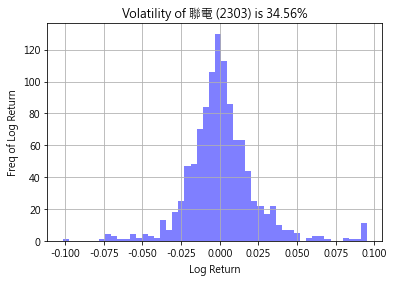

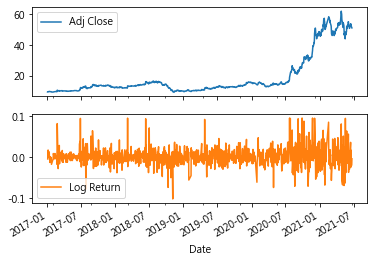

In [8]:
#聯電
get_volatility("聯電",'2017-01','2021-06')

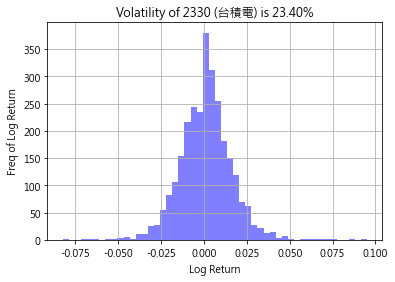

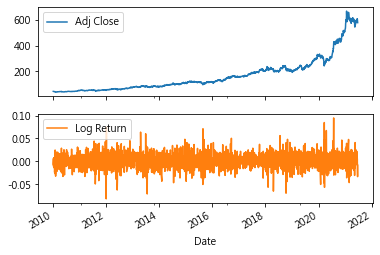

In [9]:
#台積電
get_volatility(2330,'2010-01','2021-06')

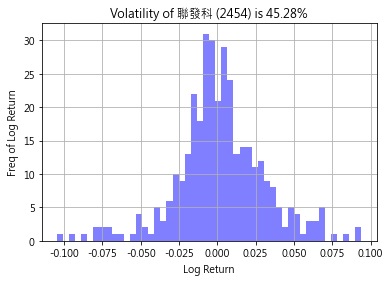

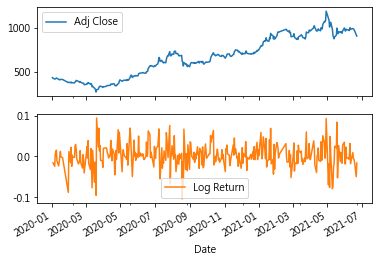

In [10]:
#聯發科
get_volatility("聯發科")

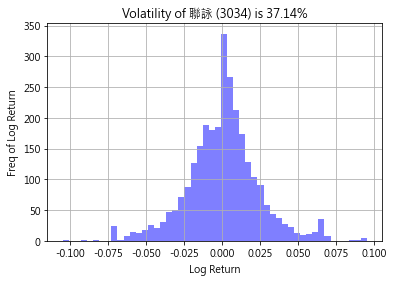

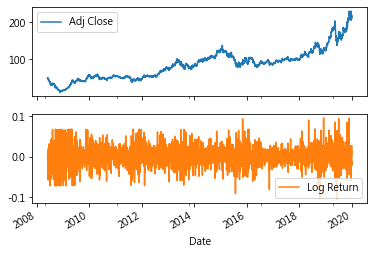

In [11]:
#聯詠
get_volatility("聯詠",start='2008-06',end='2019-12')

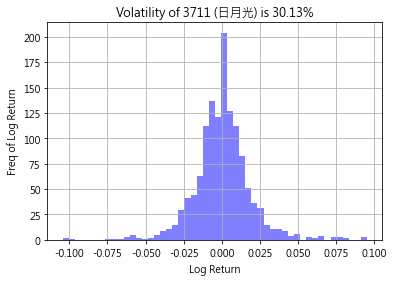

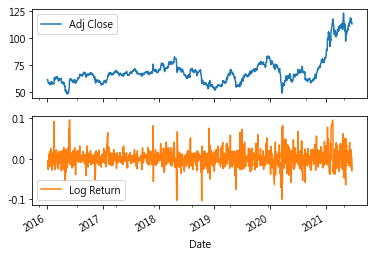

In [12]:
#日月光
get_volatility(3711,'2016-01')

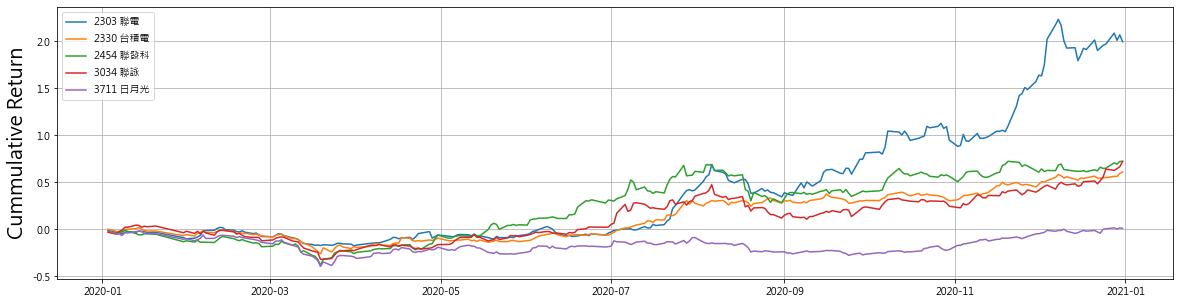

In [13]:
#draw Cummulative Return
fig,ax=plt.subplots(figsize=(20,5))
for stock in stocksnumber:
    index = get_index(str(stock))
    df = stocks[index].loc["2020-01":'2020-12',:]
    df['Log Return']=np.log(df['Adj Close']).diff(1)
    #新增Cummulative Return欄位，方法是(從第一列開始加總的Log Return)取自然對數後再-1
    df['Cummulative Return']=np.exp(np.cumsum(df['Log Return']))-1 
    ax.plot(df['Cummulative Return'],label=stock+" "+transfer(stock))
    
#ax.plot(df_2303['Cummulative Return'],color='red',label='2303')  
#ax.plot(df_2330['Cummulative Return'],color='red',label='2330')
#ax.plot(df_2454['Cummulative Return'],color='green',label='2454')
#ax.plot(df_3034['Cummulative Return'],color='orange',label='3034')
#ax.plot(df_3711['Cummulative Return'],color='purple',label='3711')

ax.set_ylabel('Cummulative Return',color='black',fontsize=20)
ax.tick_params(axis='y',labelcolor='black')
ax.legend(loc='upper left')
plt.grid()
#plt.savefig('comparison.png')
plt.show()

In [14]:
#把每隻股票的log return拉出來做成一個dataframe
stock_returns=pd.DataFrame()
for stock in stocksnumber:
    index = get_index(str(stock))
    df = stocks[index].loc["2012-01":'2021-06',:]
    df['Log Return']=np.log(df['Adj Close']).diff(1)*100  #直接乘100變百分比，後面畫圖比較方便
    stock_returns["%s %s" % (stock,transfer(stock))]= df['Log Return']
stock_returns=stock_returns.iloc[1:,:]   #把第一行N/A拿掉
stock_returns.fillna(0)                  #如果有N/A，用0取代
print(stock_returns.tail())              #just check

             2303 聯電  2330 台積電  2454 聯發科   3034 聯詠  3711 日月光
Date                                                        
2021-06-16 -2.450640 -0.658979 -0.405269 -2.325686 -2.141409
2021-06-17  1.702970  0.579232 -0.713197 -0.196271  2.141409
2021-06-18 -2.085381 -0.496279 -1.338157 -1.185785 -1.279335
2021-06-21 -1.934296 -3.373001 -4.993071 -4.057352 -3.050345
2021-06-22 -0.391391 -0.861332 -1.647484 -1.354893  0.000000


In [15]:
covariance_matrix = stock_returns.cov()*244**0.5                 #將dataframe轉成共變異數矩陣
volatility=[]
expected_return=[]
for i in range(total_stocks):
    volatility.append(stock_returns.iloc[:,i].std()*(244**0.5))  #計算每隻股票標準差
    expected_return.append(stock_returns.iloc[:,i].mean()*244)   #計算每隻股票平均報酬率(算術平均數)
print(covariance_matrix) #just check
print(volatility)        #just check
print(expected_return)   #just check

            2303 聯電   2330 台積電   2454 聯發科    3034 聯詠   3711 日月光
2303 聯電   58.997438  19.391741  19.308282  23.492053  20.929694
2330 台積電  19.391741  36.226699  21.356356  19.369314  21.236857
2454 聯發科  19.308282  21.356356  75.982199  28.302997  20.669736
3034 聯詠   23.492053  19.369314  28.302997  78.685308  22.999389
3711 日月光  20.929694  21.236857  20.669736  22.999389  56.842885
[30.357362216497012, 23.788214042706873, 34.451123179778754, 35.05857664085321, 29.79789008998826]
[19.22208127294547, 25.562943206276653, 16.633981899973882, 24.481200745089996, 13.388044257053838]


In [16]:
#計算投資組合的標準差，總之就是三個矩陣相乘，用reduce函數先處理前兩個矩陣(dataframe)，再處理第三個，最後開根號
def standard_deviation(weights):
    return np.sqrt(reduce(np.dot, [weights, covariance_matrix, weights.T]))

In [17]:
#random potfolio proportions
from functools import reduce
risk_list=[]
return_list=[]

count = 0
stop = 10000
while count < stop:
    try:
        count += 1
        weight = np.random.rand(total_stocks)   #得到一組隨機生成的list
        weight = weight / sum(weight)           #將list內容換算成整個lsit的百分比，也就是potfolio proportions
        return_list.append(sum(expected_return * weight))   #根據potfolio proportions計算報酬率
        risk_list.append(standard_deviation(weight))        #計算標準差
    except:
        pass
    print('\r' + '[Plotting]:[%s%s]%.2f%%;' % ('█' * int(count*20/stop), ' ' * (20-int(count*20/stop)),float(count/stop*100)), end='')  #進度條，總之就是格式化的輸出
print()

[Plotting]:[████████████████████]100.00%;


In [18]:
#計算效率前緣

import scipy.optimize as solver  #這個功能可以求一個function最佳(小)解

#建立一個平均的投資組合(初始組合)
percentage = 1/total_stocks     
stocks_weights = np.array([])
for i in range(total_stocks):
    stocks_weights = np.append(stocks_weights, [percentage])

x0 = stocks_weights
bounds = tuple((0, 1) for x in range(total_stocks))  #將投資比率控制再0%~到100%中間(tuples)

efficient_frontier_return_range = np.arange(14, 27, .5)   #在報酬率14%~27%中間每0.5%計算一次
efficient_frontier_risk_list = []

#計算某報酬率下，標準差最小的點
for i in efficient_frontier_return_range:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},                     #條件: 投資比率總和 = 100%
                   {'type': 'eq', 'fun': lambda x: sum(x * expected_return) - i}]   #條件: 投資報酬率 = i
    efficient_frontier = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
    efficient_frontier_risk_list.append(efficient_frontier.fun)
    print('\r' + '[Efficient Frontier]:[%s%s]%.2f%%;' % ('█' * int(count*20/stop), ' ' * (20-int(count*20/stop)),float(count/stop*100)), end='')

[Efficient Frontier]:[████████████████████]100.00%;

In [19]:
#best portfolio(sharpe ratio)
#定義計算夏普比率的公式，因為是求最小解，所以要轉成負數
def negative_s_ratio(weights):
    sd = standard_deviation(weights)
    rt = sum(weights * expected_return)
    return -(rt - risk_free) / sd

#跟上面計算效率前緣方法差不多
risk_free = 1.5 #(%)
constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}]
solution = solver.minimize(negative_s_ratio, x0=x0, constraints=constraints, bounds=bounds)
sharpe = solution.fun * (-1)
proportions = solution.x
best_risk = standard_deviation(proportions)
best_return = sum(proportions * expected_return)

#整理結果呈字串
boxtext=''
str_return = 'Portfolio Return: ' + str(format(round(best_return,4), '.2f'))+ " %\n"
str_risk = 'Portfolio Risk: ' +  str(format(round(best_risk,4), '.2f'))+ " %\n"
str_sharpe = 'Sharpe: ' + str(round(sharpe,4))+"\n"
boxtext = str_return + str_risk + str_sharpe + "\nProportions:\n"
for i in range(total_stocks):
    if round(proportions[i],2) != 0:
        if i != (total_stocks - 1):
            boxtext += (stocksname[i]+': ' + str(format(proportions[i]*100, '.2f'))+ " %\n")
        else:
            boxtext += (stocksname[i]+': ' + str(format(proportions[i]*100, '.2f')))
    else:
        pass

In [20]:
print(boxtext)

Portfolio Return: 24.84 %
Portfolio Risk: 5.55 %
Sharpe: 4.2028

Proportions:
聯電: 8.30 %
台積電: 73.73 %
聯詠: 17.97 %



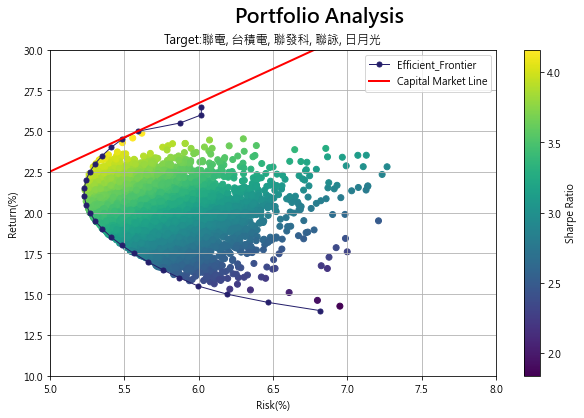

In [21]:
其#Draw result

fig = plt.figure(figsize = (10,6))
fig.suptitle('Portfolio Analysis', fontsize=20, fontweight='bold')
ax = fig.add_subplot()
#ax.plot(volatility,expected_return, 'o',color='r',markersize=5)

#畫隨機比率的結果，並用夏普值來分色
ax0 = ax.scatter(risk_list, return_list, c=(np.array(return_list)-risk_free)/np.array(risk_list), marker = 'o')
#畫效率前緣
ax.plot(efficient_frontier_risk_list, efficient_frontier_return_range, linewidth=1, color='#251f6b', marker='o', markerfacecolor='#251f6b', markersize=5, label='Efficient_Frontier')
#用斜率(Sharpe Ratio)畫Capital Market Line
ax.axline((0, risk_free), slope=sharpe, color='r', linewidth=2, label='Capital Market Line')
str1 = ', '.join(stocksname)
ax.set_title('Target:'+ str1)
ax.set_xlabel("Risk(%)")
ax.set_ylabel("Return(%)")
ax.legend()
plt.xlim(5, 8), plt.ylim(10, 30)
ax.set_xlabel("Risk(%)")
ax.set_ylabel("Return(%)")
fig.colorbar(ax0, ax=ax, label = 'Sharpe Ratio')  #根據夏普值產生色條
ax.legend()
plt.xlim(5, 8), plt.ylim(10, 30)
plt.grid()
plt.show()
#fig.savefig('result.png')

In [24]:
#設字典後再拆成兩個list是因為list可以比較直觀使用
#先load比較長期間的資料下來，之後再切期間是因為我希望節省時間，而且功能也能用在其他來源的資料
#這次報告幾乎都是用dataframe跟list結構，因為兩者相容性高，而且有順序可以方便作業
#少數其他結構如tuple則多為了使用模組之功能
#預期報酬率不是用CAPM計算，而是用平均歷史報酬率簡化代替
#我知道效率前緣是指上半部，但還蠻直觀就能看出來了，所以沒特別區分